# 1.5 Decimal Rounding

$$\renewcommand{\F}{\mathbb{F}}$$
$$\renewcommand{\Z}{\mathbb{Z}}$$
$$\renewcommand{\R}{\mathbb{R}}$$
$$\renewcommand{\succ}{\operatorname{succ}}$$


## The decimal floating point numbers with two digits $\F_{10}(2)$

* Any positive (normalised) $x\in \F_{10}(2)$ is of the form
$$x = \frac{n}{100} 10^e, \quad n=10,\ldots,99,  \; e \in \Z$$

* There are 91 such floating point numbers between 0.1 and 1:
$$S = \{0.10, 0.11, 0.12,\ldots, 0.99, 1.0\}$$

* Every number $x\in S$ which is less than one has a *successor*
$$\succ{x} = x+0.01$$

* We will also use the set of 90 *midpoints* between the floating point numbers
$$M = \{0.105,0.115,0.125,\ldots,0.985,0.995\}$$
and $M \not\subset \F_{10}(2)$

## Rounding

A *rounding function* $\phi: \R \rightarrow \F_{10}(2)$ has the following properties

* $\phi(x)=x$ for $x\in \F_{10}(2)$
* if $x \leq y$ then $\phi(x) \leq \phi(y)$ (monotonicity)
* $\phi(-x) = - \phi(x)$
* $\phi(10x) = 10\,\phi(x)$

It follows from the first two properties that any value $\phi(x)$ is either equal to the next lower or next higher floating point number, for example
$$\phi(0.12456) \in \{0.12, 0.13\}$$
The third and fourth property lets us extend the definition of $\phi$ from the interval $[0.1,1]$ to the whole set of real numbers $\R$. For example, one has
$$\phi(124.56) = 100\, \phi(0.12456)$$
applying the fourth property twice

-----------------------------------------

Examples of rounding functions include

* *truncation* where $$\phi(0.x_1x_2x_3\dots) = 0.x_1x_2$$
    and thus $\phi(0.1256) = 0.12$
    
* *rounding towards zero*
    * $\phi(0.x_1x_2x_3\dots) = 0.x_1x_2$ if $x_3\in \{0,1,2,3,4\}$
    * $\phi(0.x_1x_2x_3) = 0.x_1x_2$ if $x_3=5$ (midpoints)
    * $\phi(0.x_1x_2x_3x_4\dots) = 0.x_1x_2+0.01$ if $x_3=5$ and $x_i>0$ for some $i>4$
    
   and thus $\phi(0.1256) = 0.13$, $\phi(0.125) = 0.12$ and $\phi(0.124) = 0.12$
    
* *rounding used in most computers* is the same as rounding towards zero except that the
    second condition for the midpoints is replaced by two cases:
    * $\phi(0.x_1x_2x_3) = 0.x_1x_2$ if $x_3=5$ and $x_2$ is even
    * $\phi(0.x_1x_2x_3) = 0.x_1x_2+0.01$ if $x_3=5$ and $x_2$ is odd
    
   thus $\phi(0.125) = 0.12$ but $\phi(0.135)=0.14$
    
   this condition corrects for the bias towards zero
  
------------------------------------------------------
  
  Finally, a rounding function $\phi$ is *optimal* if it minimises the *rounding error* $|\phi(x)-x|$, i.e., if
  $$|\phi(x) - x| \leq |y - x|, \quad \text{for all $y\in \F_{10}(2)$}$$
  
  Truncation is not optimal, but both rounding towards zero and the rounding used in most computers are optimal.
  
  Note that the rounding function used in computers rounds to a different set $\F_2(53)$, however, it uses the same
  tie-breaking strategy for the midpoints.
  
--------------------------------------

  In the following we plot the graph of the rounding function $\phi$ both for $[0.1,1]$ and for $[0.1,10]$. Note that on each intervall $[10^{e-1},1^e]$ the rounding function is a step function with constant steps at the midpoints between the floating point numbers. The height of the step is proportional to $10^e$.

In [41]:
# optimal rounding functions

%matplotlib inline
from decimal import Decimal, getcontext
getcontext().prec = 3
from pylab import plot, title, loglog
t = 2
h = Decimal('0.1')**t
x = Decimal('0.1')
xg = [x,]
yg = [x,]

-------------------------------------------

In [42]:
for i in range(9*10**(t-1)):
    xg.append(x+h/2) # midpoint
    yg.append(x)
    xg.append(x+h/2) # midpoint
    yg.append(x+h)
    xg.append(x+h)
    yg.append(x+h)
    x += h

------------------------------------------

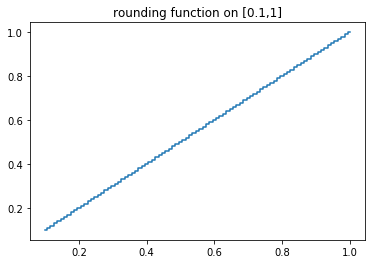

In [43]:
title('rounding function on [0.1,1]')
plot(xg,yg);

----------------------------------------

In [44]:
xg += [10*x for x in xg]
yg += [10*y for y in yg]

--------------------------------

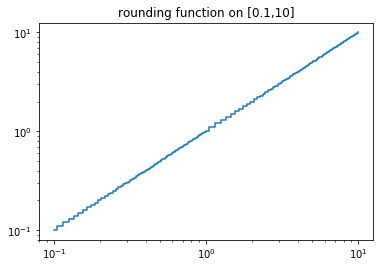

In [45]:
title('rounding function on [0.1,10]')
loglog(xg,yg);

## Rounding errors

In the following plots we have a closer look at the rounding function and the absolute and relative rounding errors.

In [46]:
# rounding  function and error

%matplotlib inline
from decimal import Decimal, getcontext
getcontext().prec = 6
from pylab import plot,  title, loglog, grid
h = Decimal('0.01')
hg = h/20
x = Decimal('0.1')
y = Decimal('0.1')
xg = [x,]
yg = [y,]
nx = 10

-------------------------------

In [47]:
for k in range(nx):
    for i in range(10):
        x += hg
        xg.append(x)
        yg.append(y)
    y += h
    xg.append(x)   # double up midpoint
    yg.append(y)
    for i in range(10):
        x += hg
        xg.append(x)
        yg.append(y)

----------------------------------------------

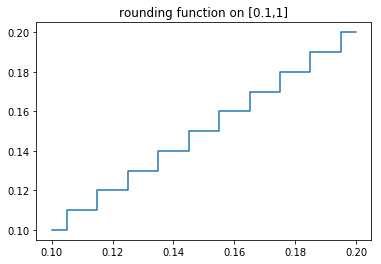

In [48]:
title('rounding function on [0.1,1]')
plot(xg,yg);

---------------------------------------

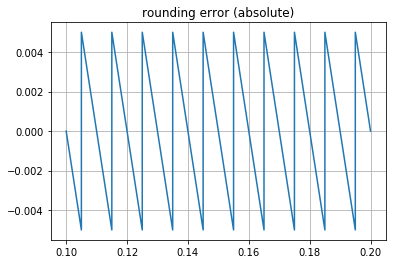

In [49]:
title('rounding error (absolute)'); grid('on');
eg = [yg[i]-xg[i] for i in range(len(xg))]
plot(xg, eg);

--------------------------------------

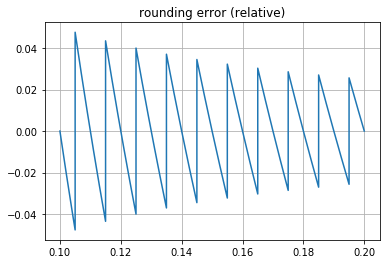

In [50]:
title('rounding error (relative)'); grid('on');
erg = [(yg[i]-xg[i])/xg[i] for i in range(len(xg))]
plot(xg,erg);

---------------------------------------

One can see that the maximal relative rounding error occurs at the first midpoint $x=0.105$. This is rounded to 
$\tilde{x}=0.1$ and the error is thus $\tilde{x}-x = -0.005$. The absolute value of the maximal relative error is then 
    $$\delta = \left|\frac{\tilde{x}-x}{x}\right| = \frac{0.005}{0.105}=0.0476.$$
This is close to the upper bound of $0.5 B^{-t+1}$ (with $B=10$ and $t=2$) given in the lectures and the bound gets better for larger mantissa sizes $t$.

Suggestion: Study the plots and derive a formal proof that the maximum of the relative rounding error is indeed obtained in the first mid point.